<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    33.287001  86.462913  69.165033  0.044486  198.959432   
      1.0    57.558742  88.014696  51.278318 -0.016917  206.834839   
      2.0    39.606079  73.348759  80.209022  0.040947  203.204807   
      3.0    38.916159  24.730199  60.352173 -0.103317  133.895215   
      4.0    37.092860  95.908215  20.677740 -0.015677  163.663138   
...                ...        ...        ...       ...         ...   
999.0 55.0   45.177472  48.630768  71.114508  0.010335  174.933083   
      56.0   31.634333  35.107405  58.884568 -0.075236  135.551069   
      57.0   62.721213  50.781429  69.133858 -0.065275  192.571225   
      58.0   38.903670  75.216790  49.298571 -0.020154  173.398877   
      59.0   33.440688  29.477379  33.840325 -0.035074  106.723317   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.918405  0.041027  
      1.0    206.857754 -0.022914  
      2.0    203.167940  0.036867  
      3.0    133.997709 -0.102494  
      4.0    163.680562 -0.017424  
...                 ...       ...  
999.0 55.0   174.920629  0.012454  
      56.0   135.615223 -0.064154  
      57.0   192.631138 -0.059912  
      58.0   173.417566 -0.018689  
      59.0   106.732350 -0.009033  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    33.287001  86.462913  69.165033  0.044486  198.959432   
      1.0    57.558742  88.014696  51.278318 -0.016917  206.834839   
      2.0    39.606079  73.348759  80.209022  0.040947  203.204807   
      3.0    38.916159  24.730199  60.352173 -0.103317  133.895215   
      4.0    37.092860  95.908215  20.677740 -0.015677  163.663138   
...                ...        ...        ...       ...         ...   
999.0 55.0   45.177472  48.630768  71.114508  0.010335  174.933083   
      56.0   31.634333  35.107405  58.884568 -0.075236  135.551069   
      57.0   62.721213  50.781429  69.133858 -0.065275  192.571225   
      58.0   38.903670  75.216790  49.298571 -0.020154  173.398877   
      59.0   33.440688  29.477379  33.840325 -0.035074  106.723317   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.918405  0.041027  
      1.0    206.857754 -0.022914  
      2.0    203.167940  0.036867  
      3.0    133.997709 -0.102494  
      4.0    163.680562 -0.017424  
...                 ...       ...  
999.0 55.0   174.920629  0.012454  
      56.0   135.615223 -0.064154  
      57.0   192.631138 -0.059912  
      58.0   173.417566 -0.018689  
      59.0   106.732350 -0.009033  

[60000 rows x 7 columns]

In [11]:
table.reset_index(inplace=True)
table

,level_0,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...,...
59995,59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

level_0         x1         x2         x3         e           Y  \
rep   index                                                                   
0.0   0.0          0  33.287001  86.462913  69.165033  0.044486  198.959432   
      1.0          1  57.558742  88.014696  51.278318 -0.016917  206.834839   
      2.0          2  39.606079  73.348759  80.209022  0.040947  203.204807   
      3.0          3  38.916159  24.730199  60.352173 -0.103317  133.895215   
      4.0          4  37.092860  95.908215  20.677740 -0.015677  163.663138   
...              ...        ...        ...        ...       ...         ...   
999.0 55.0     59995  45.177472  48.630768  71.114508  0.010335  174.933083   
      56.0     59996  31.634333  35.107405  58.884568 -0.075236  135.551069   
      57.0     59997  62.721213  50.781429  69.133858 -0.065275  192.571225   
      58.0     59998  38.903670  75.216790  49.298571 -0.020154  173.398877   
      59.0     59999  33.440688  29.477379  33.840325 -0.035074  106.723317   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.918405  0.041027  
      1.0    206.857754 -0.022914  
      2.0    203.167940  0.036867  
      3.0    133.997709 -0.102494  
      4.0    163.680562 -0.017424  
...                 ...       ...  
999.0 55.0   174.920629  0.012454  
      56.0   135.615223 -0.064154  
      57.0   192.631138 -0.059912  
      58.0   173.417566 -0.018689  
      59.0   106.732350 -0.009033  

[60000 rows x 8 columns]

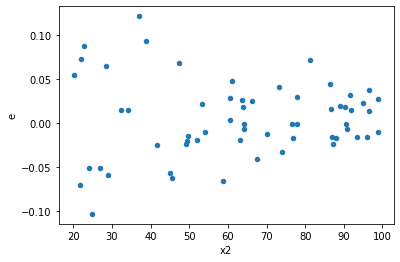

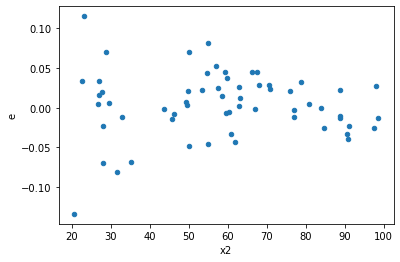

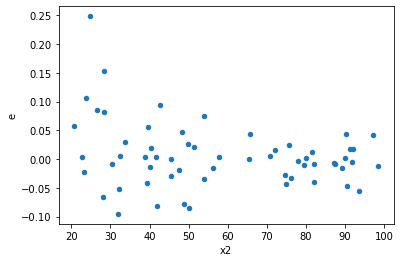

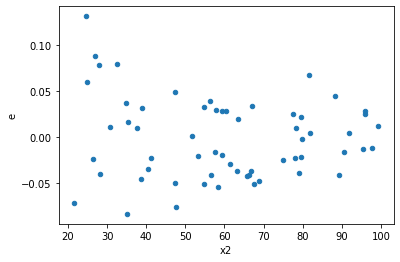

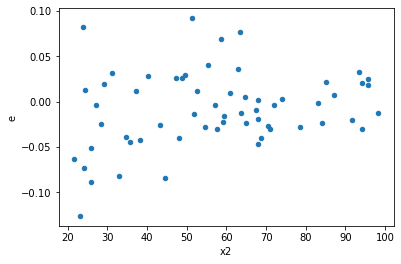

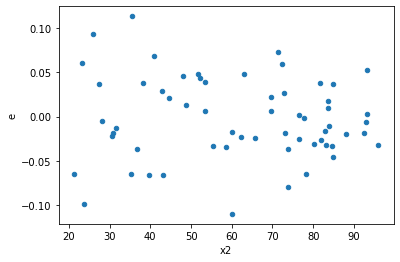

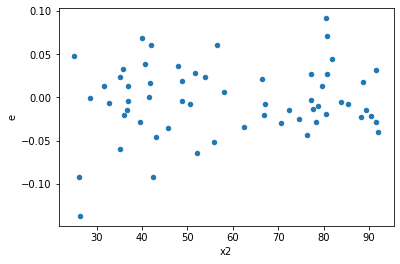

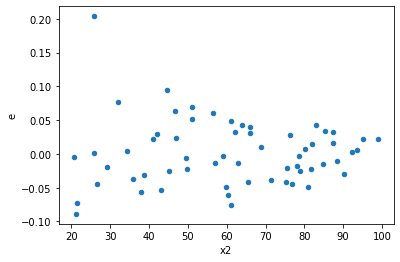

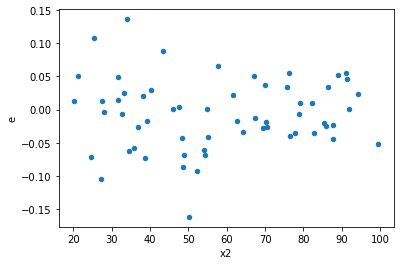

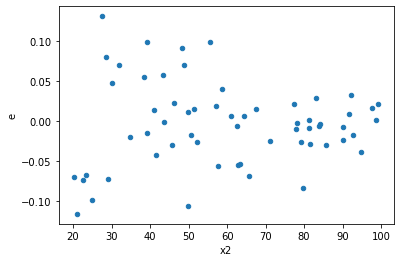

In [14]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
10.0,21.0,21.0,0.024466783841604542,0.02624812669685927,0.0011650849448383116,0.0012499107950885366,1.0728065800060587,0.8735849907210911,0.5632075046394545,0.43679249536054554,Reject001=1 : Homoscedasticity
14.0,21.0,21.0,0.026688864033355127,0.0314630908274993,0.0012708982873026252,0.0014982424203571095,1.1788846010147698,0.709590369315686,0.645204815342157,0.354795184657843,Reject001=1 : Homoscedasticity
20.0,21.0,21.0,0.04086281682008984,0.047639007640363266,0.0019458484200042781,0.0022685241733506317,1.1658277952327059,0.7284195988620248,0.6357902005689876,0.3642097994310124,Reject001=1 : Homoscedasticity
30.0,21.0,21.0,0.029684512507609565,0.03461840457996113,0.0014135482146480746,0.0016484954561886253,1.1662109853104972,0.7278615254271794,0.6360692372864103,0.3639307627135897,Reject001=1 : Homoscedasticity
33.0,21.0,21.0,0.03271355047332965,0.046955722292197535,0.0015577881177776022,0.00223598677581893,1.4353600148195194,0.41442729659821986,0.7927863517008901,0.20721364829910993,Reject001=1 : Homoscedasticity
42.0,21.0,21.0,0.03559568984690115,0.068855429355661,0.0016950328498524358,0.0032788299693171903,1.9343754721937305,0.13865796128528562,0.9306710193573572,0.06932898064264281,Reject001=1 : Homoscedasticity
46.0,21.0,21.0,0.03905257781156558,0.04017753476396799,0.0018596465624555036,0.0019132159411413326,1.0288062149912482,0.9487315820459006,0.5256342089770497,0.4743657910229503,Reject001=1 : Homoscedasticity
53.0,21.0,21.0,0.027190026521997472,0.04650203865560868,0.0012947631677141652,0.002214382793124223,1.7102608788552403,0.22705603822934872,0.8864719808853256,0.11352801911467436,Reject001=1 : Homoscedasticity
55.0,21.0,21.0,0.03312646480161724,0.03690829415005116,0.0015774507048389162,0.0017575378166691028,1.114163384806739,0.8066826157821934,0.5966586921089033,0.4033413078910967,Reject001=1 : Homoscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.06851035631219547,0.012486427473221054,0.003262397919628356,0.0005945917844390978,0.1822560579939409,0.0002563775405247309,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.03841219392146674,0.033184267245899485,0.0018291520914984162,0.0015802032021856897,0.8638992949411927,0.7405673876656859,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.10584860572327559,0.03710787963811297,0.005040409796346457,0.001767041887529189,0.3505750442771598,0.020195800534996557,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,0.051637008862680946,0.02454132491114385,0.002458905183937188,0.0011686345195782786,0.4752661986368528,0.0957782884652176,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,0.04544105521783674,0.020351038763136153,0.00216385977227794,0.0009690970839588644,0.4478557697565937,0.07257923584540592,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,0.057696093441570895,0.0377865065375254,0.0027474330210271853,0.001799357454167876,0.6549231374874968,0.33968432943091814,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,0.03359069724595857,0.028688440740202818,0.0015995570117123127,0.0013661162257239438,0.8540591024395733,0.7210894401830307,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,0.048040851760209086,0.021757162411635063,0.002287659607629004,0.001036055352935003,0.45288877308490855,0.07654359637969195,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,0.06477886572202621,0.03357272529823239,0.0030847078915250577,0.0015987012046777328,0.5182666433570623,0.14014528295544512,Reject001=1 : Homoscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      751
Reject001=0 : Heteroscedasticity    249
Name: Result_test, dtype: int64